In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "rohandwivedi" # username from the json file
os.environ['KAGGLE_KEY'] = "f9dc6ff134fdd2bd299440ec5cf46888" # key from the json file
!kaggle datasets download -d pmigdal/alien-vs-predator-images

 35% 5.00M/14.1M [00:00<00:00, 29.7MB/s]
100% 14.1M/14.1M [00:00<00:00, 55.9MB/s]


In [3]:
from zipfile import ZipFile

file_name = "/content/alien-vs-predator-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


done


In [4]:
%tensorflow_version 1.4
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
______________________________________________________

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

train_dir="data/train"
validation_dir="data/validation"

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 93s 931ms/step - loss: 0.6315 - acc: 0.6326 - val_loss: 0.6141 - val_acc: 0.6300
Epoch 2/30
100/100 [==============================] - 92s 919ms/step - loss: 0.5512 - acc: 0.7116 - val_loss: 0.6149 - val_acc: 0.6700
Epoch 3/30
100/100 [==============================] - 92s 917ms/step - loss: 0.4766 - acc: 0.7853 - val_loss: 0.5202 - val_acc: 0.7400
Epoch 4/30
100/100 [==============================] - 92s 923ms/step - loss: 0.3952 - acc: 0.8335 - val_loss: 0.5151 - val_acc: 0.7400
Epoch 5/30
100/100 [==============================] - 93s 928ms/step - loss: 0.3323 - acc: 0.8598 - val_loss: 0.5031 - val_acc: 0.7650
Epoch 6/30
100/100 [==============================] - 92s 925ms/step - loss: 0.2691 - acc: 0.8999 - val_loss: 0.5216 - val_acc: 0.7750
Epoch 7/30
100/100 [==============================] - 92s 921ms/step - loss: 0.2059 - acc: 0.9268 - val_loss: 0.5359 - val_acc: 0.7700
Epoch 8/30
100/100 [===========================

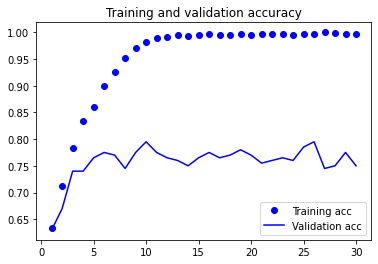

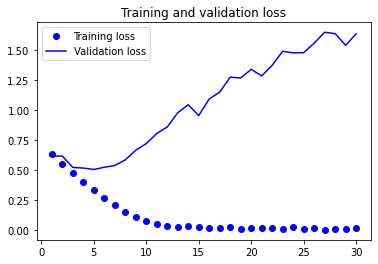

In [9]:
model.save('aliensVsPredators_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()